In [1]:
import pickle
import os
from sklearn.decomposition import PCA
import numpy as np
import json

In [2]:
dataset = "elec"
all_file = "itm_emb_np"
domainA_file = "{}_A".format(all_file) # domain A file
domainB_file = "{}_B".format(all_file) # domain B file
pca_dimension = 128 # the target dimension

In [3]:
llm_emb_A = pickle.load(open(os.path.join("./handled/", 
                                          "{}.pkl".format(domainA_file)), "rb"))
llm_emb_B = pickle.load(open(os.path.join("./handled/", 
                                          "{}.pkl".format(domainB_file)), "rb"))

In [4]:
pcaA = PCA(n_components=pca_dimension)
pca_emb_A = pcaA.fit_transform(llm_emb_A)
pcaB = PCA(n_components=pca_dimension)
pca_emb_B = pcaB.fit_transform(llm_emb_B)

In [5]:
with open(os.path.join("./handled/", 
                       "{}_pca{}.pkl".format(domainA_file, pca_dimension)), "wb") as f:
    pickle.dump(pca_emb_A, f)

with open(os.path.join("./handled/", 
                       "{}_pca{}.pkl".format(domainB_file, pca_dimension)), "wb") as f:
    pickle.dump(pca_emb_B, f)

In [6]:
all_dimension = 1024
all_emb = np.concatenate([llm_emb_A, llm_emb_B])

In [7]:
pcaAll = PCA(n_components=all_dimension)
pca_emb_all = pcaAll.fit_transform(all_emb)

In [8]:
with open(os.path.join("./handled/", 
                       "{}_all.pkl".format(all_file)), "wb") as f:
    pickle.dump(pca_emb_all, f)

In [9]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [10]:
# all_emb = pickle.load(open("./douban/handled/item_emb_all.pkl","rb"))

In [11]:
len(all_emb)

12738

In [12]:
tsne_all = TSNE(n_components=2, random_state=1)
draw_all = tsne_all.fit_transform(all_emb)

In [13]:
threshold = json.load(open("./handled/id_map.json", "r"))["item_dict"]["item_count"]["0"]

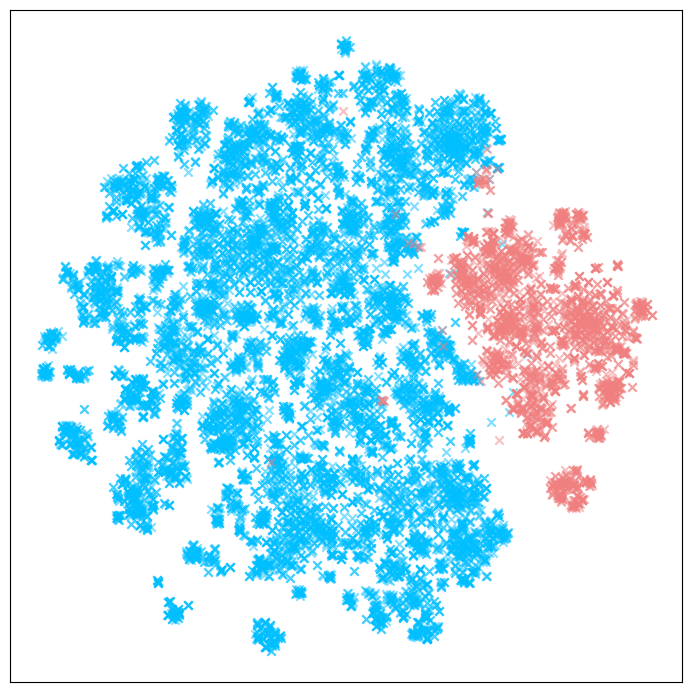

In [14]:
patterns = [".", "x", "|", "o", "*", "O", "/", "\\", "+", "-", "H"]
color = ['yellow', 'lightcoral', 'deepskyblue', 'violet', 'red', 'magenta', 'cyan', 'brown', 'white', 'brown', 'teal', 'green']
labels = ["1-4", "5-10", "11-39", "30+"]

plt.figure(figsize=(7, 7))
plt.scatter(draw_all[:threshold, 0], draw_all[:threshold, 1], c=color[2], marker="x", label=labels[0], alpha=0.5)
plt.scatter(draw_all[threshold:, 0], draw_all[threshold:, 1], c=color[1], marker="x", label=labels[1], alpha=0.5)
# plt.legend(fontsize=40,frameon=True)
plt.xticks([])
plt.yticks([])
plt.tight_layout(pad=1)
# plt.savefig("./figures/tsne_sas" + '.pdf')
# plt.savefig("./figures/tsne_sas" + '.png', dpi=200)
plt.show()